# Assignment #1 - Linear Regression

<font color="red"> <b> Due: Oct 9 (Friday) 11:00 pm </b> </font>


<font color="blue"> Sreekar Nedunuri, St ID: 801167891 </font>

# Introduction

The objective of this assignment is to create a linear regression model for a given dataset (Arzamasov, "UCI Machine Learning").

Linear regression is used to model the relationship between observed variables. Idea is to fit the observations into linear relationship.

For this to happen, we need to understand the variable which is to be predicted and the predictor variable which will help in predicting.

We are using numpy for array manipulation, pandas is used for data manipulation and analysis, sklearn is used to build machine learning models. Matplotlib and seaborn for visualization

# Data

### Description

This is Electrical Grid Stability Simulated Data Set from UCI Machine Learning Repository where we identify if data is stable or unstable based on few attirbutes like power consumption and user
 Attribute Information:

11 predictive attributes, 1 non-predictive(p1), 2 goal fields:
1. tau[x]: reaction time of participant (real from the range [0.5,10]s). Tau1 - the value for electricity producer.
2. p[x]: nominal power consumed(negative)/produced(positive)(real). For consumers from the range [-0.5,-2]s^-2; p1 = abs(p2 + p3 + p4)
3. g[x]: coefficient (gamma) proportional to price elasticity (real from the range [0.05,1]s^-1). g1 - the value for electricity producer.
4. stab: the maximal real part of the characteristic equation root (if positive - the system is linearly unstable)(real)
5. stabf: the stability label of the system (categorical: stable/unstable)

The local stability analysis of the 4-node star system (electricity producer is in the center) implementing Decentral Smart Grid Control concept.

## Importing libraries and Reading the Data

We can import the necessary libraries needed for this assignment and since this is a csv we can use pandas built in function read_csv to read the dataset and use the head() to view the data. By default it displays first five entries.

In [1]:
# Importing necessary libraries for assignment
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
# Reading csv data using pandas
energyy = pd.read_csv("Data_for_UCI_named.csv")
energyy.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


## Pre Processing of data

We have read the data from .csv file and now we need to check the data for nulls or values which are not intended to be for the respective attribute.

We can use the .info() to check the null value counts and check for consistency in data types. We even need to convert any text data into numerical data and look at attributes to identify intuitively which attribute is not needed for the assignment.

After looking at the data, we can conclude that stabf attribute can be dropped since it object and is classification categorical data which is not needed for this regression data and storing stab field which is the target attribute in target variable

In [3]:
# Checking if the data has non null values
energyy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [4]:
energy = energyy.drop('stabf',axis=1)
target = energyy['stab']
energy

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789


In [5]:
target

0       0.055347
1      -0.005957
2       0.003471
3       0.028871
4       0.049860
          ...   
9995    0.023892
9996   -0.025803
9997   -0.031810
9998    0.037789
9999    0.045263
Name: stab, Length: 10000, dtype: float64

## Normalization and Standardization

First we need to Check the minimum and maximum value for each attribute so as to see if data has to be normalized or not.

Here, we check how distributed are the minimum and maximum values and how far they are separated, if they are separated apart from 0 and 1, we need to normalize the attribute, I used Min Max method of normalization. 

First i described the data and then applied min max to the attributes

We will use sklearn inbuilt class MinMaxScaler to normalize and then convert into data frame since MinMax return numpy nd array and then converting into dataframe energy_df.

In [6]:
# Checking the minimum and maximum value for each attribute so as to see if data has to be normalized or not
energy.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [7]:
## Since minimum and max values are separated, we need to normalize it to stabilize.
from sklearn.preprocessing import MinMaxScaler
energy_numerical = energy[['tau1','tau2','tau3','tau4','p1','p2','p3','p4','g1','g2','g3','g4']]
norm = MinMaxScaler().fit(energy_numerical)
energy_norm=norm.transform(energy_numerical)
energy_norm

array([[0.258801  , 0.2715607 , 0.82961551, ..., 0.85222919, 0.88153113,
        0.95589431],
       [0.92679272, 0.46342358, 0.26811698, ..., 0.85521477, 0.539078  ,
        0.77032342],
       [0.89179939, 0.87879525, 0.26800518, ..., 0.75443962, 0.83100004,
        0.06297995],
       ...,
       [0.19615798, 0.24652253, 0.87123881, ..., 0.98585209, 0.10446344,
        0.1010163 ],
       [0.9612621 , 0.36782825, 0.23753691, ..., 0.56585897, 0.88329277,
        0.8088868 ],
       [0.63479724, 0.66124738, 0.40520519, ..., 0.47941064, 0.34603379,
        0.93967879]])

In [8]:
## Converting into DataFrame and viewing the data
energy_df = pd.DataFrame(energy_norm)
energy_df.columns = energy_numerical.columns
energy_df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.499986,0.500001,0.499988,0.500004,0.506188,0.499999,0.500006,0.499984,0.500028,0.500002,0.499982,0.500022
std,0.288730,0.288699,0.288730,0.288721,0.175663,0.288732,0.288715,0.288709,0.288712,0.288722,0.288711,0.288719
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249940,0.250008,0.250007,0.249972,0.382012,0.250029,0.249968,0.249994,0.250032,0.250027,0.249977,0.249990
50%,0.499987,0.499999,0.499985,0.499976,0.506428,0.500022,0.500023,0.499979,0.500038,0.500005,0.499997,0.500024
75%,0.749988,0.749998,0.750017,0.750014,0.630532,0.750051,0.749998,0.749957,0.749979,0.750020,0.749937,0.749977
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##  Visualization & Observation

In this step we try to extract valuable insightful data from the plots

In [9]:
energy.p1.sum()

37499.9995793617

In [10]:
energy.columns

Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4', 'stab'],
      dtype='object')

In [11]:
ev = {}
for cols in energy.columns:
    ev[cols] = energy[cols].sum()
col = list(ev.keys())
sum = list(ev.values())

en = pd.DataFrame.from_dict({'Attributes':col,'sum':sum})
en

,Attributes,sum
0,tau1,52499.999306
1,tau2,52500.010220
2,tau3,52500.035242
3,tau4,52499.970644
4,p1,37499.999579
5,p2,-12500.004574
6,p3,-12499.997444
7,p4,-12499.997560
8,g1,5249.997888
9,g2,5250.002584


## Observation of below plot
As you can see energy is negatively consumed for p2,p3 and p4, as per data logic we are adding p2,p3,p4 to get p1. These are the sum of the attributes

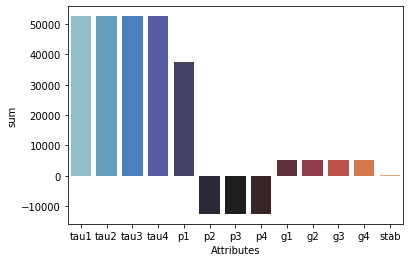

In [12]:
import seaborn as sns
sns.barplot(x='Attributes',y='sum',data=en,palette='icefire')
plt.show()

## Observation of below plot

In this plot we have distribution of nominal power and the sum of p2,p3,p4 to identify the distribution of the data, we can notice that data is distributed in between 2 and 6

Text(0, 1.0, 'abs(p2 + p3 + p4)')

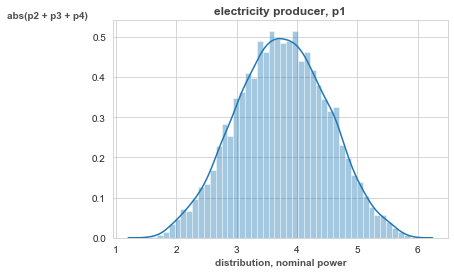

In [13]:
sns.set_style("whitegrid")
sns.distplot(energy['p1'])
plt.title("electricity producer, p1", fontweight='bold', color='#404040')
plt.xlabel('distribution, nominal power', fontweight='bold', color='#505050')
plt.ylabel('abs(p2 + p3 + p4)', color='#505050', rotation=0, fontweight='bold', horizontalalignment='right', y=1.0)

## Observation of below plot
In these plots we can observe how stable and unstable data are correlated, why consumption of power is negatively impacted.

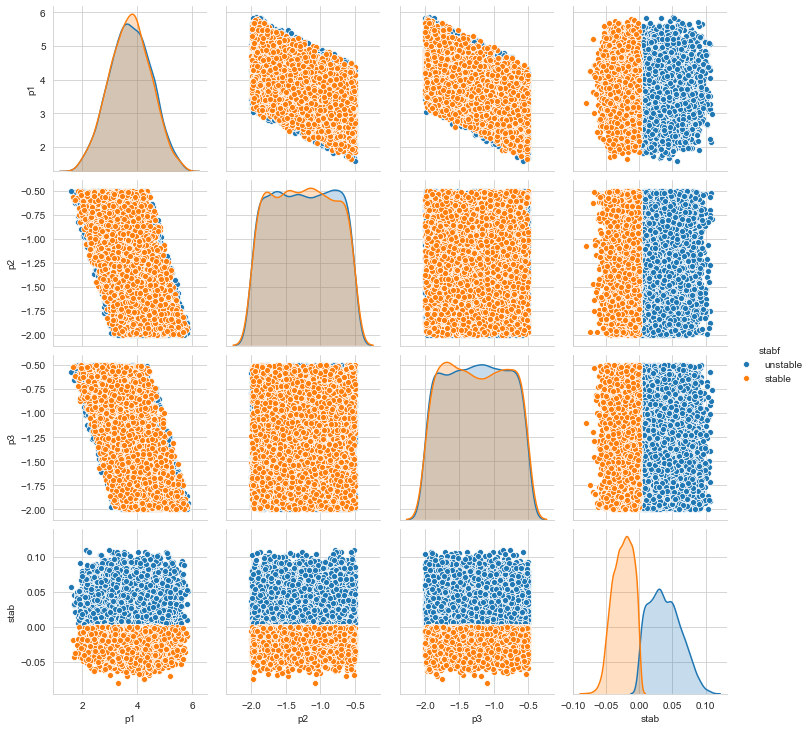

In [14]:
sns.pairplot(energyy[['p1','p2','p3','stab','stabf']],diag_kind='kde',hue='stabf')

# Method

### Review

The least squares regression method works by minimizing the sum of the square of the errors as small as possible, hence the name least squares. Basically the distance between the line of best fit and the error must be minimized as much as possible. This is the basic idea behind the least squares regression method.

The least mean square algorithm uses a technique called “method of steepest descent” and continuously estimates results by updating filter weights. Through the principle of algorithm convergence, the least mean square algorithm provides particular learning curves useful in machine learning theory and implementation.


### Code Explanation
 
The least squares method is a statistical procedure to find the best fit for a set of data points by minimizing the sum of the residuals of points from the plotted curve.
least squares generally uses all the available data for training or finding the best fit.

Two classes have been defined:
1. train(self,X,T)
2. self(self,X)

 __init__ is a initialization module where we initilize our model and is the constructor where linear model is called.
 
Then we define two classes train(self,X,T) and use(self,X). These are subclasses of Basemodel ABC.


train(self,X,T) function trains the weight w for the whole training dataset. It calculates the best weight for the model. The weight is calculated using self.w. This will train lease-squares model.

use(self,X) function takes in the test values of X. Based on X, it predicts Y and returns. This will apply the learned model to data X. 



### Least Mean Squares

Least squares uses all the available data for training or finding the best fit. This can be often computationally costly, especially with large data sets for which we consider online learning and in online learning process, we introduce a data point one by one, and update the parameters. Using the updated parameters, it makes a new estimation and repeat these steps. 

In LMS, we will have some input features x and along with their (scalar-valued) output y as our data, and the goal is to estimate a parameter vector. We calculate the distance from the line to a given data point by subtracting one from the other.

This has three functions:
1) Train(self,X,Y)
2) train_step(self,x,t)
3) use(self,X)



Train(self,X,Y)

This function calls train_step functions and runs iteratively. It is updating w at each iteration. It recursively calls the function till end of the for loop.

train_step(self,x,t)

The job of this function is to do sanity check initially of the matrix if it is 2d or not and similarly it will check for weights. Based on the need it will append zeroes and would multiply with learning rate.

use(self,X)

use(self,X) function takes in the test values of X. Based on X, it predicts Y and returns. This will apply the learned model to data X.

In [15]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

In [16]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        X = self.add_ones(X)
        xt = X.T.dot(X)
        self.w = np.linalg.pinv(xt).dot(X.T).dot(T)
        self.w = self.w.T
        return self.w  ## TODO: replace this with your codes
    
    # apply the learned model to data X
    def use(self, X):
        X = self.add_ones(X)
        a=self.w.dot(X.T)
        return a.T  ## TODO: replace this with your codes

In [17]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
        for x,t in zip(X,T):
            self.train_step(x,t)  ## TODO: replace this with your codes
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        x = x.reshape(1,x.size)
        xr = self.add_ones(x)
        t = t.reshape(t.size,1)
        if self.w is None:
            self.w = np.zeros((xr.shape[1],1))
        self.w = self.w - self.alpha*(xr@self.w - t)*xr.T  ## TODO: replace this with your codes
    
    # apply the current model to data X
    def use(self, X):
        N = X.shape[0]
        X1 = np.hstack((np.ones((N, 1)), X.reshape((X.shape[0], -1))))
        return X1 @ self.w   ## TODO: replace this with your codes

In [18]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    model.w = np.zeros((X.shape[1]+1, T.shape[1]))
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )

training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.


In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

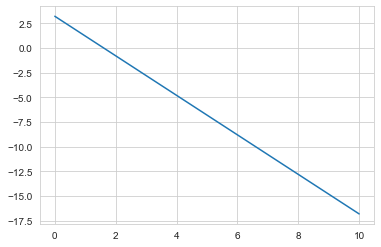

In [20]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2

ls = LinearRegress()

ls.train(X, T)

plt.plot(ls.use(X))

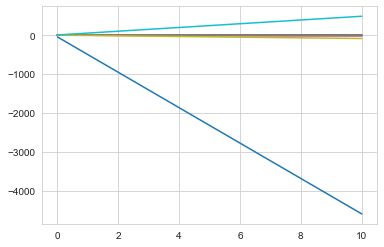

In [21]:
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

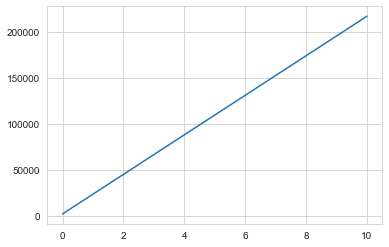

In [22]:
lms.train(X, T)
plt.plot(lms.use(X))

# Experiments

In experiment section, i have first splitted the data into test and train using sklearn train_test_split method.
Then have trained it  using Linear Regression Class for least squares and used X_test to predict y_prediction. These experminets have helped me understand the model better!

## Visualization of Results
Used scatter plot to plot y_test,y_pred just to understand the distribution and then had to convert the actual values and predicted values into pandas data frame so that i can plot it, when i plotted predicted value i could see a lot of noise in the data.

I have used sns.distplot((y_test-y_pred) to identify the distribution of data, i found that data was distibuted between -0.050 to +0.050 with less deviations which is difference between prediction vs actual data.

I customized LMStest class for fitting least mean square error to my data and trained it using lms class and sorted the data to get noiseless output. Initially i had noise output with LMS data too.

I found lms regression analysis faster, data being distributed better.

## Analysis/Comparison of Algorithms


The least squares regression method works by minimizing the sum of the square of the errors as small as possible, hence the name least squares. Basically the distance between the line of best fit and the error must be minimized as much as possible. This is the basic idea behind the least squares regression method.

->The data must be free of outliers because they might lead to a biased and wrongful line of best fit.

->The line of best fit can be drawn iteratively until you get a line with the minimum possible squares of errors.

->This method works well even with non-linear data.

->Technically, the difference between the actual value of ‘y’ and the predicted value of ‘y’ is called the Residual (denotes the error).


The least mean square algorithm uses a technique called “method of steepest descent” and continuously estimates results by updating filter weights. Through the principle of algorithm convergence, the least mean square algorithm provides particular learning curves useful in machine learning theory and implementation. This minimizes cost function.

The measurement errors cause deviations from the original values. But after all, we require to fit a line through these points, a curve that mathematically predicts the trend of the data, this can be achieved by assuming a line with slope m and intercept c, and thus calculating Least Mean Squared Errors for each point, and finally finding the values of m and c which minimize the Least Mean Squared Errors expression (this can be found by differentiating). This is an example from Linear Regression, there are many more applications of Least mean Squared Algorithms.

##### Time Complexity

Time complexity can be seen as the measure of how fast or slow an algorithm will perform for the input size. Time complexity is always given with respect to some input size (say n).

For a least squares regression with N training examples and C features, it takes:

O(C2N) to multiply XT by X

O(CN) to multiply XT by Y

O(C3) to compute the product (XTX)−1(XTY)

Time complexity of Least Square: O(C2N)
Time complexity of Least Mean Square: O(NK)

##### Space Complexity

Space complexity can be seen as the amount of extra memory you require to execute your algorithm. Like the time complexity, it is also given with respect to some input size (n).

Space Complexity is O(nk + n) which is invariantly O(k) as space required is in linear time constant space and we need to store only w and b in memory.


In [23]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
dtypes: float64(12)
memory usage: 937.6 KB


In [24]:
X=energy_df
y=energy['stab'].values

In [25]:
#We are plotting graph for train and prediction of the data for least squares
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
ls=LinearRegress()
ls.train(X_train,y_train)
y_pred=ls.use(X_test)

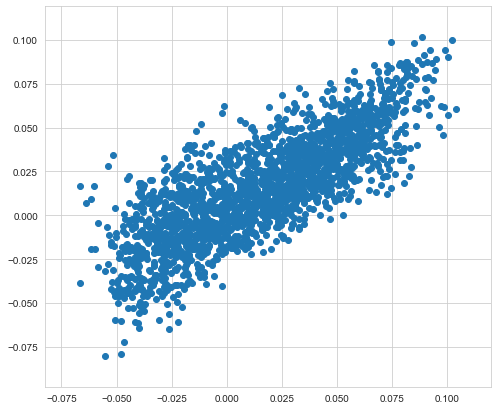

In [26]:
fig,ax=plt.subplots(figsize=(8,7))
plt.scatter(y_test,y_pred)

In [27]:
test_result = pd.DataFrame(y_test)
# sns.lineplot(data=may_flights, x="year", y="passengers")
pred_result = pd.DataFrame(y_pred)

result = pd.concat([test_result,pred_result],axis=1)
result.columns=['actual','pred']
result

,actual,pred
0,0.046820,0.047736
1,-0.026054,-0.064705
2,-0.004453,-0.024807
3,-0.044360,-0.002540
4,0.032639,0.024546
...,...,...
1995,-0.050315,-0.012304
1996,0.025955,0.027538
1997,-0.002824,-0.007837
1998,-0.022103,0.008286


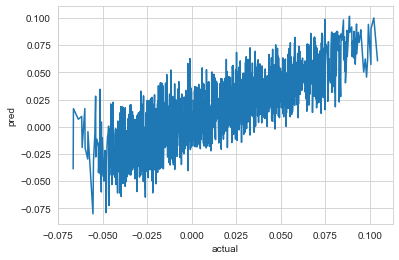

In [28]:
sns.lineplot(data=result, x="actual", y="pred")

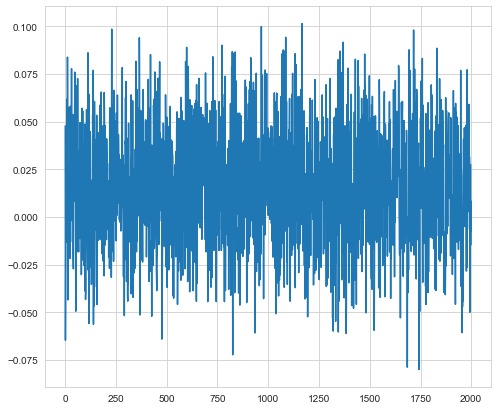

In [29]:
fig,ax=plt.subplots(figsize=(8,7))
plt.plot(y_pred)

Text(0.5, 0, 'prediction vs actual')

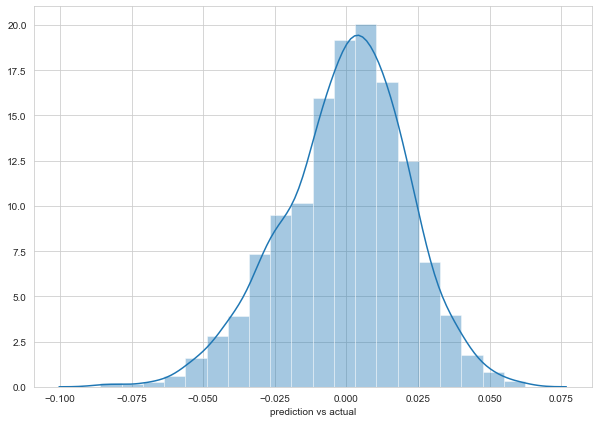

In [30]:
fig,ax=plt.subplots(figsize=(10,7))
sns.distplot((y_test-y_pred),bins=20);
plt.xlabel('prediction vs actual')

In [31]:
import collections # for checking iterable instance

# LMS class 
class LMStest(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
        # initial weights with random values
        self.w = np.random.rand(X.shape[1])
        # First create X1 by adding 1's column to X
        X = np.c_[np.ones((X.shape[0], 1)), X]
        for k in range(X.shape[0]):
            self.train_step(x,t)
            
    # train LMS model one step 
    # here the x is 1d vector
    # partone = (np.dot(w.T,X1[k]))-T[k]
    def train_step(self, x, t):
        self.w = np.random.rand(X.shape[1])
        partone = (np.dot(self.w.T,x))-t
        parttwo = np.dot(self.alpha,partone)
        partthree = np.dot(parttwo,x)
        self.w = self.w-partthree
    
    # apply the current model to data X
    def use(self, X):
#         X1 = self.add_ones(X)
        return np.dot(X,self.w)   ## TODO: replace this with your codes

In [32]:
lms = LMStest(0.1)
for k in range(X_train.shape[0]):
    lms.train_step(X.iloc[k],y_train[k])
Z = lms.use(X_test)

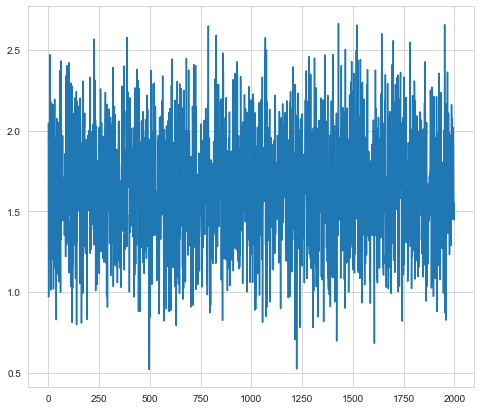

In [33]:
fig,ax=plt.subplots(figsize=(8,7))
plt.plot(Z)

In [34]:
sorted = np.sort(Z)

In [35]:
sorted

array([0.51899605, 0.52263063, 0.68170902, ..., 2.65316269, 2.65594554,
       2.66272214])

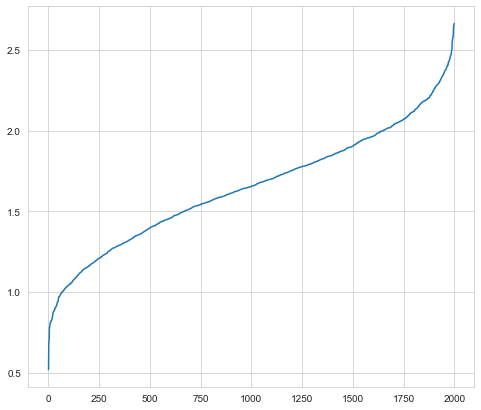

In [36]:
fig,ax=plt.subplots(figsize=(8,7))
plt.plot(sorted)

# III. Conclusions

The objective of this assigment is to create a linear regression model. 
Although, I have created linear regression model and applied it to data, I strongly feel the data which i have used and the model which i have implemented did not correlate much after noticing the plots. It had a lot of noise in the output and we may need better model to learn this data. LMS and least squares have been applied and preliminary tests have been passed.

# References

1. Arzamasov Vadim, “UCI Machine Learning Repository: Electrical Grid Stability Simulated Data
Set.” Archive.Ics.Uci.Edu, https://archive.ics.uci.edu/ml/datasets/Electrical+Grid+Stability+Simulated+Data+. Accessed 20 Sept.2020.
2. “Pandas.DataFrame.Plot — Pandas 1.1.2 Documentation.” Pandas.Pydata.Org,https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html. Accessed 09 October 2020.
3. "Visualizing distributions of Data using seaborn."seaborn.pydata.org, https://seaborn.pydata.org/tutorial/distributions.html. Accessed 09 October 2020.
4. "numpy.array." Numpy.org, https://numpy.org/doc/stable/reference/generated/numpy.array.html. Accessed 09 October 2020.
5. "Packages" docs.python.org, https://docs.python.org/3/tutorial/modules.html. Accessed 09 October 2020.
6. "least square error." en.wikipedia.org, https://en.wikipedia.org/wiki/Mean_squared_error. Accessed 09 October 2020.
7. Zulaikha Lateef, "Minimizing error." edureka.co, https://www.edureka.co/blog/least-square-regression/#:~:text=The%20least%20squares%20regression%20method%20works%20by%20minimizing%20the%20sum,the%20least%20squares%20regression%20method. Accessed 09 October 2020.
8. ImportanceOfBeingErnest. "Type Error ufunc Multiply." 26 April 2017, https://stackoverflow.com/questions/42013903/typeerror-ufunc-multiply-did-not-contain-a-loop-with-signature-matching-types. Accessed 09 October 2020.
9. Kumar Paritosh, "Computational Complexity of ML Models." https://medium.com/@paritoshkumar_5426/time-complexity-of-ml-models-4ec39fad2770#:~:text=Knowing%20the%20Computational%20complexity%20is%20very%20important%20in%20Machine%20Learning.&text=Time%20complexity%20can%20be%20seen,perform%20for%20the%20input%20size.&text=Time%20is%20linear%20with%20respect,)%20and%20dimensions%20(d). Accessed 09 October 2020.
10. Andree, "Computational complexity of least square regression operation." 22 November 2011, "https://math.stackexchange.com/questions/84495/computational-complexity-of-least-square-regression-operation." Accessed 09 October 2020.